Совместный хакатон студентов курсов Data Science и Менеджер проектов, где они работают в командах над разработкой ML-модели для сопоставления текстов музыкальных произведений и для поиска каверов (вариации обработки оригинала с элементами новой аранжировки) по их текстам.

Необходимо разработать ML-продукт, который:

- Находит все кавер-треки и/или исходники к заданному треку в датасете
- Перечисляет все кавер-треки и/или оригиналы к заданному, указывает положение данного трека в цепочке каверов

### Разметка каверов

Файл covers.json содержит разметку каверов, сделанную редакторами сервиса:

- track_id - уникальный идентификатор трека;
- track_remake_type - метка, присвоенная редакторами. Может принимать значения ORIGINAL и COVER;
- original_track_id - уникальный идентификатор исходного трека.

💡 Обратите внимание, что не для всех каверов известны идентификаторы исходных треков!!!
### Метаинформация

- track_id - уникальный идентификатор трека;
- dttm - первая дата появления информации о треке;
- title - название трека;
- language - язык исполнения;
- isrc - международный уникальный идентификатор трека;
- genres - жанры;
- duration - длительность трека;

### Текст песен

- track_id - уникальный идентификатор трека;
- lyricId - уникальный идентификатор текста;
- text - текст трека.

In [93]:
import pandas as pd
import matplotlib.pyplot as plt

### meta

In [101]:
meta = pd.read_json('/home/asketon/Documents/Masterskaja_YP DS Yandex Music_2023-10-24/data/meta.json', lines=True)

In [102]:
meta['track_id'].duplicated().sum()

0

In [103]:
meta = meta.set_index('track_id')
meta['dttm'] = pd.to_datetime(meta['dttm'], unit='ms')

In [104]:
meta.head()

,dttm,title,language,isrc,genres,duration
track_id,,,,,,
c3b9d6a354ca008aa4518329aaa21380,2021-12-16 21:00:00,Happy New Year,EN,RUB422103970,[DANCE],161120.0
c57e3d13bbbf5322584a7e92e6f1f7ff,2021-11-24 14:00:33,Bad Habits,EN,QZN882178276,[ELECTRONICS],362260.0
955f2aafe8717908c140bf122ba4172d,2021-11-24 15:37:03,Por Esa Loca Vanidad,None,QZNJZ2122549,"[FOLK, LATINFOLK]",260000.0
fae5a077c9956045955dde02143bd8ff,2021-11-24 15:37:03,Mil Lagrimas,None,QZNJZ2166033,"[FOLK, LATINFOLK]",190000.0
6bede082154d34fc18d9a6744bc95bf5,2021-11-24 15:37:03,Sexo Humo y Alcohol,None,QZNJZ2122551,"[FOLK, LATINFOLK]",203000.0


In [46]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71769 entries, c3b9d6a354ca008aa4518329aaa21380 to 5731fc0a34c663a0c0082c712df15266
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dttm      71768 non-null  datetime64[ns]
 1   title     71768 non-null  object        
 2   language  21969 non-null  object        
 3   isrc      71455 non-null  object        
 4   genres    71768 non-null  object        
 5   duration  71768 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 3.8+ MB


In [89]:
meta['isrc'].duplicated().sum()

485

Text(0, 0.5, 'Frequency')

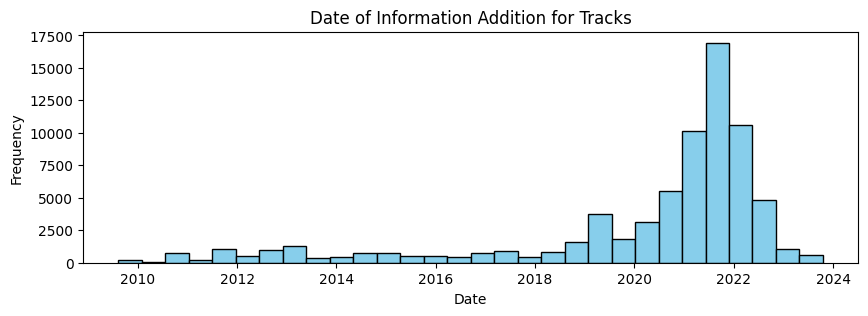

In [99]:
plt.figure(figsize=(10, 3))

plt.hist(meta['dttm'], bins=30, color='skyblue', edgecolor='black')

plt.title('Date of Information Addition for Tracks')
plt.xlabel('Date')
plt.ylabel('Frequency')

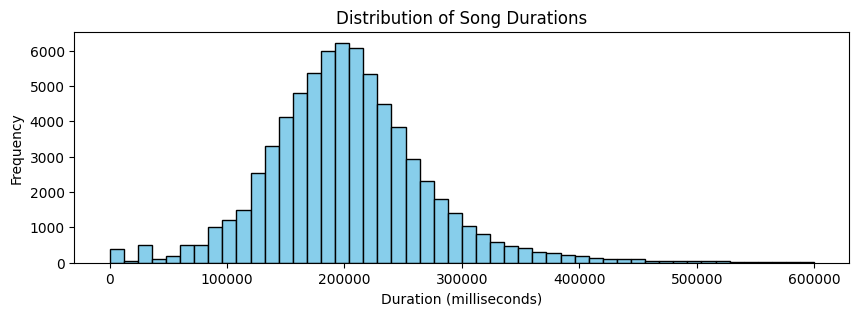

In [100]:
plt.figure(figsize=(10, 3))
plt.hist(meta['duration'], bins=50, range=(0, 600000), color='skyblue', edgecolor='black')
plt.title('Distribution of Song Durations')
plt.xlabel('Duration (milliseconds)')
plt.ylabel('Frequency')
plt.show() 

## covers

In [106]:
covers = pd.read_json('/home/asketon/Documents/Masterskaja_YP DS Yandex Music_2023-10-24/data/covers.json', lines=True)

In [107]:
covers['track_id'].duplicated().sum()

0

In [108]:
covers = covers.set_index('track_id')

In [109]:
covers.head()

,original_track_id,track_remake_type
track_id,,
eeb69a3cb92300456b6a5f4162093851,eeb69a3cb92300456b6a5f4162093851,ORIGINAL
fe7ee8fc1959cc7214fa21c4840dff0a,fe7ee8fc1959cc7214fa21c4840dff0a,ORIGINAL
cd89fef7ffdd490db800357f47722b20,cd89fef7ffdd490db800357f47722b20,ORIGINAL
995665640dc319973d3173a74a03860c,995665640dc319973d3173a74a03860c,ORIGINAL
d6288499d0083cc34e60a077b7c4b3e1,None,COVER


In [110]:
covers.info();

<class 'pandas.core.frame.DataFrame'>
Index: 71597 entries, eeb69a3cb92300456b6a5f4162093851 to 7b0f6ff24137be50cf5ea5f82d789448
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   original_track_id  4821 non-null   object
 1   track_remake_type  71597 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [69]:
covers['track_remake_type'].value_counts()

track_remake_type
COVER       67304
ORIGINAL     4293
Name: count, dtype: int64

список самых часто повторяющихся значений в столбце covers['original_track_id']

In [66]:
covers['original_track_id'].value_counts().head(10)

original_track_id
f3e5e9db509f9b6f6d93b9c38e4e1324    38
17a163f6ab3de102b49599f5577866fc    32
deb9b9598176a0bab1212d430b10bd04    31
53a04991308c2cc9179fdd401fea83a3    30
eeb69a3cb92300456b6a5f4162093851    25
9050384cce6c221c39d6e25d02561612    25
8e0235cf2a39eacc4c78885ca7dd4de3    24
ad1b9fe17c16ab73b2a52920fdb1a220    19
cfcd208495d565ef66e7dff9f98764da    17
0fcb82fec458a0993f848200548eaaa0    17
Name: count, dtype: int64

In [73]:
covers[covers['track_remake_type'] == 'ORIGINAL'].duplicated().sum()

0

Кол-во каверов с имеющимися 'original_track_id':

In [77]:
covers.loc[(covers['track_remake_type'] == 'COVER') & (~covers['original_track_id'].isna()), 'original_track_id'].count()

528

### lyrics

In [111]:
lyrics = pd.read_json('/home/asketon/Documents/Masterskaja_YP DS Yandex Music_2023-10-24/data/lyrics.json', lines=True)

In [113]:
lyrics.head()

,lyricId,text,track_id
0,a951f9504e89759e9d23039b7b17ec14,"Живу сейчас обломами, обломками не той любви\n...",1c4b1230f937e4c548ff732523214dcd
1,0c749bc3f01eb8e6cf986fa14ccfc585,Tell me your fable\nA fable\nTell me your fabl...,0faea89b0d7d6235b5b74def72511bd8
2,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,9c6dc41d5ccd9968d07f055da5d8f741
3,e2c8830fbc86e5964478243099eec23a,You're ashamed about all your fears and doubts...,bfd04a73e9cffdf0e282c92219a86ea1
4,7624653ca8522ba93470843c74961b7d,"You showed him all the best of you,\nBut I'm a...",8d70930d09cd239c948408d1317d8659


Дубликаты по столбцам:

In [112]:
lyrics['track_id'].duplicated().sum()

1137

In [83]:
lyrics['text'].duplicated().sum()

770

In [115]:
lyrics['lyricId'].duplicated().sum()

499

In [119]:
lyrics[lyrics['track_id'].duplicated()].sort_values('track_id')

,lyricId,text,track_id
10681,039236cf5355b4a81a7d5e689dbbf00a,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
10686,0abe3bb343894590423064dee2d2a114,Hearts go astray\nLeaving hurt when they go\nI...,0021519c8533f1116591948bbb349aef
11306,1682f991cfa94d1440bef2aa417edec7,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a
9220,6e3781576e60cfbee15f65d626ac130a,"If I stay with you, if I'm choosing wrong\nI d...",0102189356af15ad0be804eddd9bc24a
8330,52d3570b1f1e50113f10cdd65869614e,Well sometimes I go out by myself\nAnd I look ...,02db8e8e8d3c08f3a57cc6db3876f942
...,...,...,...
8880,b48c26ba7186a8de9de9f3121a783da4,I got lost in the wilderness\nI thought I was ...,fd93fa564461b42fea969d6cc1d16c18
7556,6ba951bfe34b90ab611f63c67caa708f,This night is cold in the kingdom\nI can feel ...,ff032309afbd44985497077e1f041e97
11229,b2bd7e1c3e5b8987b0a7df143a2c3c0f,"I cover the waterfront,\nI'm watching the sea,...",ff54e3bcd7ef7aeb41c91f9abeac9c68
8881,d9107cc98fb6dc91853ea69ac98f1d58,Don't go tonight\nStay here one more time\nRem...,ff77df3ccccd54654ea4b2209dd6e38c


In [120]:
lyrics = lyrics.set_index('track_id')

In [114]:
lyrics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11414 entries, 0 to 11413
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   lyricId   11414 non-null  object
 1   text      11414 non-null  object
 2   track_id  11414 non-null  object
dtypes: object(3)
memory usage: 267.6+ KB


Дубликаты по обоим столбцам:

In [80]:
lyrics.duplicated().sum()

499

Дубликаты по совпадению первых 50 знаков по столбце 'text':

In [85]:
lyrics['text'].str[:50].duplicated().sum()

2076

In [86]:
lyrics['text'].str[:50].value_counts()

text
Kiss me hard before you go\nSummertime sadness\nI ju    24
The world was on fire and no one could save me but      23
Sweet dreams are made of this\nWho am I to disagree     20
Twenty-five years and my life is still\nI'm trying      16
Load up on guns, bring your friends\nIt's fun to lo     15
                                                        ..
Un gatto bianco con gli occhi blu\nUn vecchio vaso       1
За мои зелёные глаза\nНазываешь ты меня колдуньей\nГ     1
I'm a Barbie girl, in the Barbie world\nLife in pla      1
As coisas que tinham valor\nEu perdi e o mal triunf      1
Этой ночью чьё-то сердце от любви горит\nВсё внутри      1
Name: count, Length: 9338, dtype: int64

## Объединенный датасет

In [56]:
df = meta.join(covers, how='left')
df = df.join(lyrics, how='left')

In [54]:
df.tail()

,dttm,title,language,isrc,genres,duration,original_track_id,track_remake_type,lyricId,text
track_id,,,,,,,,,,
fffc8f02feca70f7fad88fb987b76c4e,2021-10-02 00:35:55,La Luz de la Cara Roja,None,ARAB82100052,"[ROCK, ALLROCK]",200100.0,None,COVER,NaN,NaN
fffefc046267a3f6263fc2c8d0f3f871,2021-10-11 21:47:01,Uska Hi Banana,None,QZNJX2142230,[FOLK],185880.0,None,COVER,NaN,NaN
ffff8f1c01d78267ce067a2507fcc8f8,2019-05-17 16:50:33,No Limit,None,PLS921752714,[],175950.0,None,COVER,NaN,NaN
ffff9a22aa441db772206280ffb8b52e,2015-02-04 21:00:00,You're a Woman,None,None,[POP],321820.0,ffff9a22aa441db772206280ffb8b52e,ORIGINAL,748ffc10cc43b1a7e5524ad11fb9a182,Tonight\nBe no darkness tonight\nHold tight\nL...
None,NaT,None,None,None,None,NaN,NaN,NaN,NaN,NaN


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72906 entries, 0000757a652c12554a82002cd90cc10a to None
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   dttm               72905 non-null  datetime64[ns]
 1   title              72905 non-null  object        
 2   language           22870 non-null  object        
 3   isrc               72566 non-null  object        
 4   genres             72905 non-null  object        
 5   duration           72905 non-null  float64       
 6   original_track_id  5378 non-null   object        
 7   track_remake_type  72571 non-null  object        
 8   lyricId            11414 non-null  object        
 9   text               11414 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 6.1+ MB


In [61]:
df.describe(include='all')

,dttm,title,language,isrc,genres,duration,original_track_id,track_remake_type,lyricId,text
count,72905,72905,22870,72566,72905,7.290500e+04,5378,72571,11414,11414
unique,NaN,45462,85,71283,232,NaN,4468,2,10915,10644
top,NaN,Morena,EN,US4BR0500030,"[FOLK, LATINFOLK]",NaN,f3e5e9db509f9b6f6d93b9c38e4e1324,COVER,28fbafaf626c497d0d4d933b4f0d3f5b,Twenty-five years and my life is still\nI'm tr...
freq,NaN,81,16121,24,18399,NaN,41,67770,9,15
mean,2020-02-22 02:06:38.293175808,NaN,NaN,NaN,NaN,2.051841e+05,NaN,NaN,NaN,NaN
min,2009-08-10 17:32:06,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN
25%,2019-07-28 21:15:47,NaN,NaN,NaN,NaN,1.616300e+05,NaN,NaN,NaN,NaN
50%,2021-05-03 21:37:10,NaN,NaN,NaN,NaN,1.996500e+05,NaN,NaN,NaN,NaN
75%,2021-11-12 22:24:01,NaN,NaN,NaN,NaN,2.392800e+05,NaN,NaN,NaN,NaN
max,2023-10-18 21:00:00,NaN,NaN,NaN,NaN,5.487300e+06,NaN,NaN,NaN,NaN
